In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('market.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

Text(0, 0.5, 'Count')

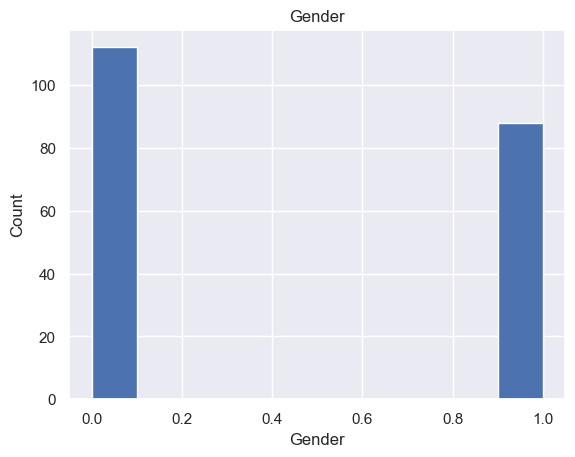

In [9]:
df.hist('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

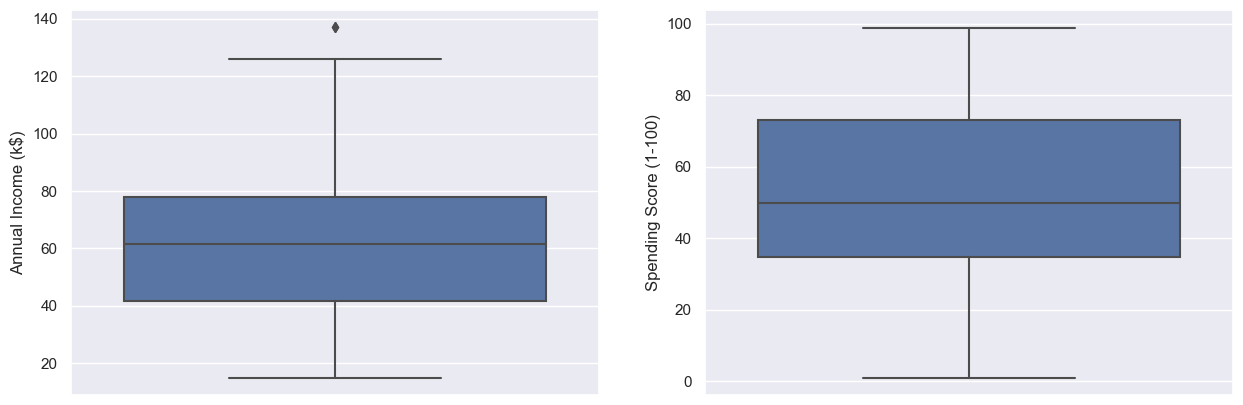

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

Text(0, 0.5, 'Count')

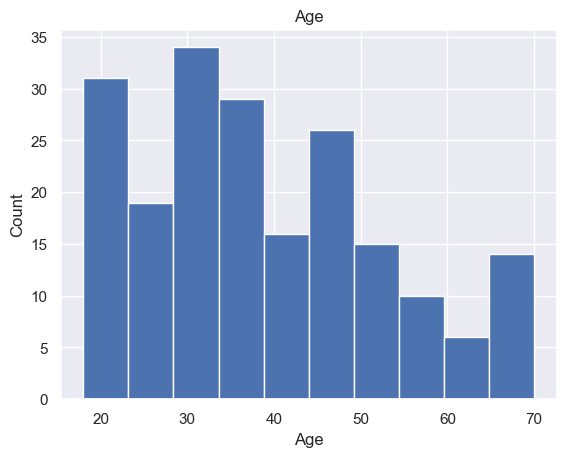

In [11]:
df.hist('Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

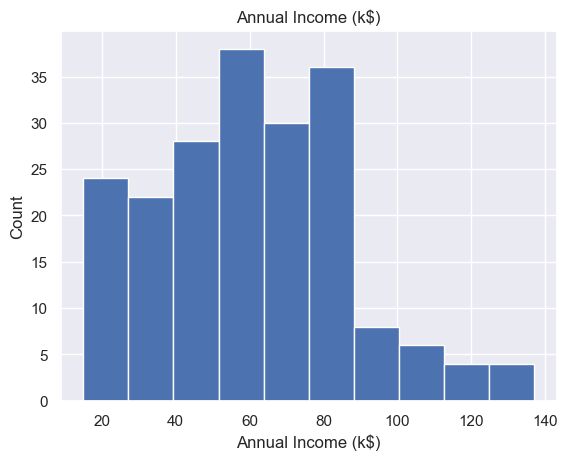

In [12]:
df.hist('Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

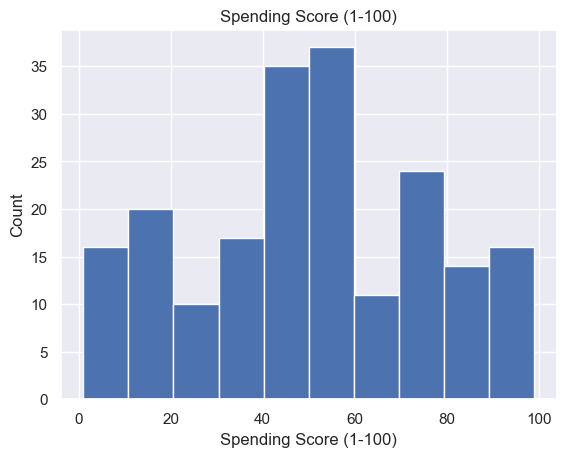

In [13]:
df.hist('Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')

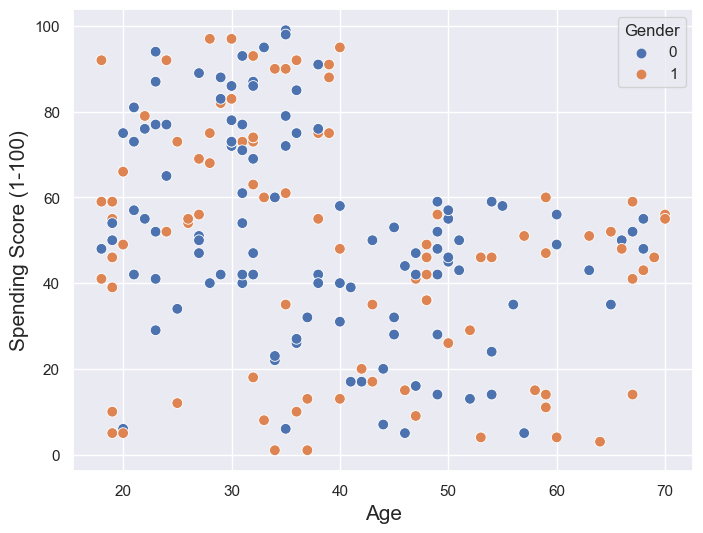

In [14]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Spending Score (1-100)", hue="Gender", s=60)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Spending Score (1-100)", fontsize=15)
plt.show()

In [15]:
df_grouped = df.groupby('Gender')['Annual Income (k$)'].mean()

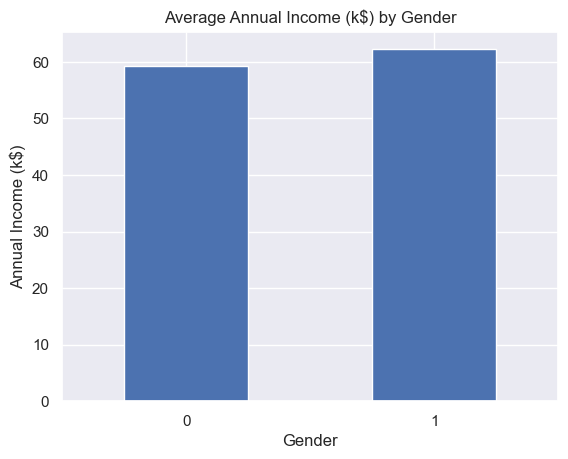

In [16]:
ax = df_grouped.plot(kind='bar', rot=0)

# set the title and axis labels
ax.set_title('Average Annual Income (k$) by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')

plt.show()

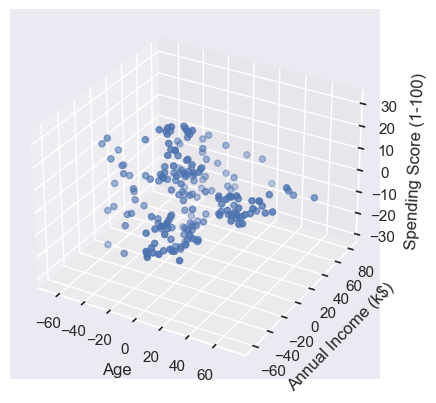

In [17]:
# Create a sample dataframe with three components
df_new = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


# Perform PCA on three components (age, income, and Score)
pca = PCA(n_components=3)
pca.fit(df_new)
df_pca = pca.transform(df_new)

# Plot a 3D scatter plot of the PCA results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

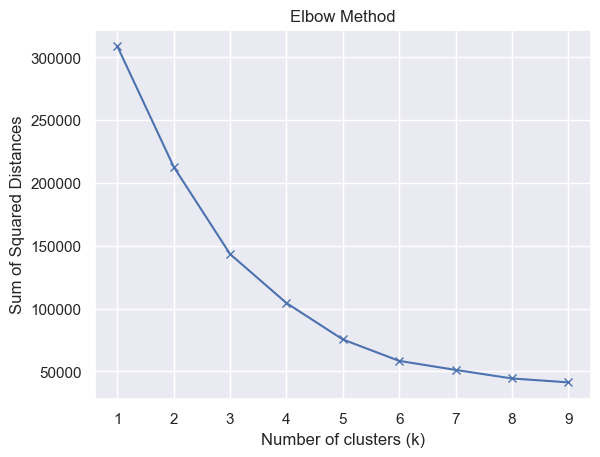

In [18]:
k_values = range(1, 10)

SSE = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_new)
    SSE.append(kmeans.inertia_)
    
plt.plot(k_values, SSE, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [19]:
kmeans.fit(df_new)

KMeans(n_clusters=9)

In [20]:
distance_metric = 'euclidean'
linkage_criteria = 'ward'

In [21]:
n_clusters = 5

In [22]:
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance_metric, linkage=linkage_criteria)

In [23]:
agg_clustering.fit(df_new)

AgglomerativeClustering(n_clusters=5)